# Loan Prediction Problem


In [125]:
#load packages and set file paths.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

d1 = pd.read_csv(r"C:\Users\HP-PC\Documents\Python materials\Project\DataSet\train_dataset.csv")
d2 = pd.read_csv(r"C:\Users\HP-PC\Documents\Python materials\Project\DataSet\test_dataset.csv")

In [126]:
#Combining train and test datasets
def get_combined_data():
    targets = d1.Loan_Status
    combined = d1.append(d2)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [127]:
combined = get_combined_data()
combined.describe()

C:\Users\HP-PC\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [128]:
combined.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No


In [129]:
#check for NaNs.
combined.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [130]:
combined['Gender'].fillna('Male', inplace=True)

In [131]:
combined['Married'].fillna('No', inplace=True)

In [132]:
combined['Dependents'].fillna('0', inplace=True)

In [133]:
combined['Self_Employed'].fillna('Yes', inplace=True)

In [134]:
combined['LoanAmount'].fillna(combined['LoanAmount'].mean(), inplace=True)

In [135]:
combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mean(), inplace=True)

In [136]:
combined['Credit_History'].fillna('1', inplace=True)

In [137]:
combined['Loan_Status'].fillna('1.0', inplace=True)

In [138]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    combined[i] = le.fit_transform(combined[i])
combined.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History        object
Dependents             int64
Education              int64
Gender                 int64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
Married                int64
Property_Area          int64
Self_Employed          int64
dtype: object

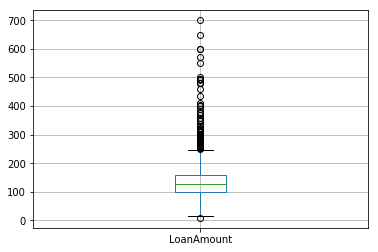

In [139]:
combined.boxplot(column = 'LoanAmount')

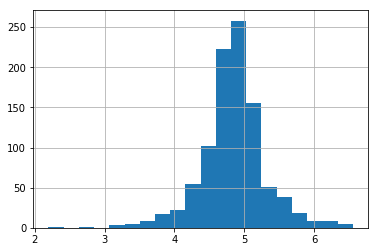

In [140]:
combined['LoanAmount_log'] = np.log(combined['LoanAmount'])
combined['LoanAmount_log'].hist(bins=20)

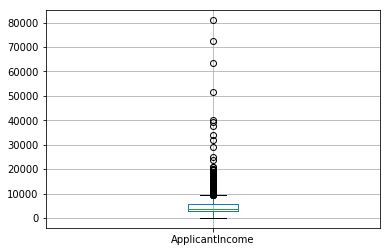

In [141]:
combined.boxplot(column = 'ApplicantIncome')

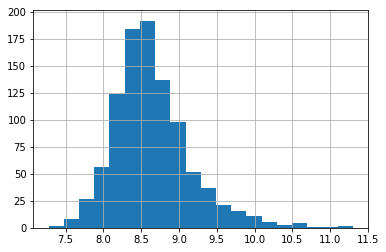

In [142]:
combined['TotalIncome'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined['TotalIncome_log'] = np.log(combined['TotalIncome'])
combined['TotalIncome_log'].hist(bins=20)

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [144]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [145]:
def recover_train_test_target():
    global combined, d1
    targets = d1.Loan_Status
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [146]:
train, test, targets = recover_train_test_target()

In [156]:
clf = RandomForestClassifier(n_estimators=400)
clf = clf.fit(train, targets)

In [157]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

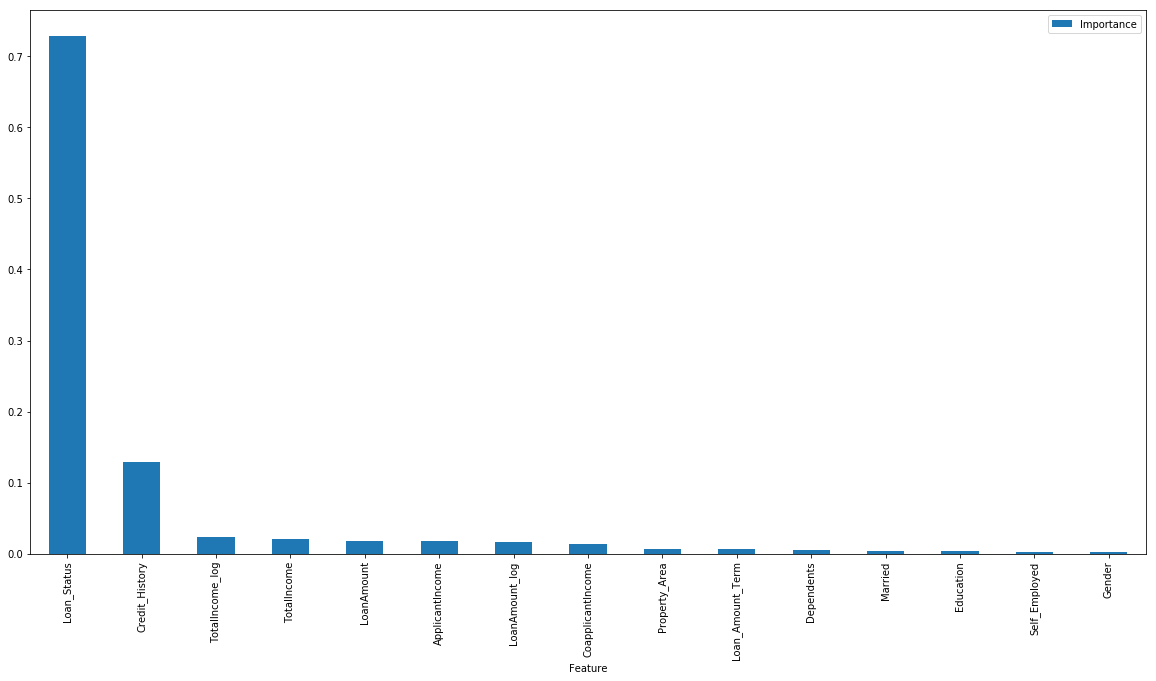

In [158]:
features.plot(kind='bar', figsize=(20, 10))

In [159]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 2)

In [160]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 2)

In [161]:
forest = RandomForestClassifier(n_estimators=400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
forest.fit(train, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [162]:
compute_score(forest, train, targets, scoring='accuracy')

1.0

In [163]:
output = forest.predict(test)
df_output = pd.DataFrame()
aux = pd.read_csv('test_dataset.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

In [155]:
df_output.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
